In [1]:
import cv2
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib as mpl
import matplotlib.pyplot as plt
# from scipy.spatial.distance import mahalanobis

In [2]:
import os, sys
sys.path.insert(0,os.path.realpath(os.path.pardir))

In [3]:
from utils.config import cfg
from utils.tools import image

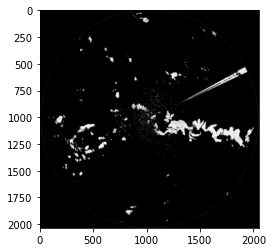

In [4]:
pic = cv2.imread("../data/bkk_radar_images_dBZ/bkk_radar_images_dBZ_1/1592461954.png", 0)

plt.imshow(pic, cmap='gray')
plt.show()

In [5]:
class Dataloader():
    def __init__(self, pd_path):
        self.data = None
        self.df = pd.read_pickle(pd_path)
        self.df['FolderPath'] = '../data/bkk_radar_images_dBZ/bkk_radar_images_dBZ_1/'
    
    def _load(self):
        self.df['img_path'] = self.df['FolderPath'] + self.df['FileName']
        self.data = image.quick_read_frames(path_list=self.df['img_path'].tolist()[:50], grayscale=True)

In [6]:
pd_path = cfg.ONM_PD.FOLDER_1
dl = Dataloader(pd_path)
dl._load()

In [7]:
dl.data.shape

(50, 1, 2034, 2048)

In [8]:
dl.data[0].max()

## Unexpected Output!

222

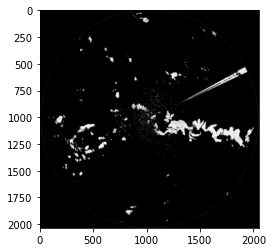

In [9]:
plt.imshow(dl.data[0][0], cmap='gray')
plt.show()

## DENOISE

In [29]:
x = np.empty((2034*2048,255), dtype=float)

In [28]:
dl.data[:,0,1000,1000]

array([  0,   0,   0,   0,   0, 160,   0,   0, 205,   0, 222,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=uint8)

In [11]:
for i in dl.data.shape[2]:
    for j in dl.data.shape[3]:
        dl.data[:,0,i,j]



In [12]:
# mean = np.mean(data, axis=0)

In [13]:
# diff = data - np.expand_dims(mean,axis=0)

In [14]:
# var = np.var(data, ddof=1, axis=1)
# var

In [15]:
# mahal_img = mahalanobis(pic, np.repeat(mean, 2034*2048), np.repeat(var, (2034*2048)**2).reshape(2034*2048,2034*2048))

In [16]:
# diff = pic - mean
# S = diff @ diff.T / diff.shape[0]-1
# S = np.linalg.inv(S.T @ S) @ S.T

In [17]:
# S

In [18]:
# mean + 3*np.sqrt(var)

In [19]:
# filltered_pic = np.zeros(pic.shape)

# for i in tqdm(range(pic.shape[0])):
#     # for j in range(pic.shape[1]):
#     dis = mahalanobis(pic[i], mean, 1/var)
#     if dis > (mean + 3*np.sqrt(var)):
#         filltered_pic[i] = 0
#     else:
#         filltered_pic[i] = pic[i]

In [20]:
# filltered_pic = np.array(filltered_pic, dtype=np.uint32).reshape(2034,2048)

# plt.figure(figsize=(10, 10), dpi=80)
# plt.imshow(filltered_pic, cmap='gray')
# plt.show()

In [21]:
# (filltered_pic.reshape(-1)-pic.reshape(-1)).sum()

In [22]:
# mahalanobis(pic[0,0], mean, var)